In [1]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pylab as plt
import glob
import os
import numpy as np
from scipy import stats

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ozkilim/anaconda3/envs/clam/lib/python3.7/s

### Plot test sets auc and F1 across splits. 

In [2]:
BEVnet_F1s = []
BEVnet2x_F1s = []
ImageNet_F1s = []
ImageNet_SSL_F1s = []

def test_auc(tf_path):
    """Take a tf output path and create a list of values for the validtion auc of an experement"""
    auc = []
    for event in summary_iterator(tf_path):
        for value in event.summary.value:
            if value.tag == "final/F1":
                auc.append(value.simple_value)
    return auc

def plot_splits(root_dir,ax,data_size,c,label=None, marker="o"):
    # Set the root directory to search
    all_aucs = []
    file_extension = "*.gpu1"
    # Recursively traverse the directory and its subdirectories
    for subdir, _, files in os.walk(root_dir):
        # Use glob to find all files with the specified extension
        for file in glob.glob(os.path.join(subdir, file_extension)):
            auc = test_auc(file)
            all_aucs.append(auc[0])
    # plot mean and range  
    mean = np.mean(all_aucs,axis=0)
    std = np.std(all_aucs,axis=0)
    standard_error = std/np.sqrt(len(all_aucs))
    ax.errorbar(data_size,mean,yerr=standard_error, fmt='o',capsize=5,alpha=1,c=c, label=label, marker=marker)

    if root_dir == "../results_20X/DLBCL/DLBCL_random_5_s1":
        ax.set_xlabel("Number of pre-training images",fontsize=12)
        ax.set_ylabel("Test F1", fontsize=12)
    
    ax.set_xticks([1,1280000,2500000])
    ax.set_xticklabels([0, '1.28M', '2.5M'])
    
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    if "imagenet_dino" in root_dir: 
        ImageNet_SSL_F1s.append(all_aucs)
    if "FlockNet1X" in root_dir: 
        BEVnet_F1s.append(all_aucs)
    if "FlockNet2X" in root_dir: 
        BEVnet2x_F1s.append(all_aucs)
    if "imagenet_supervised" in root_dir:
        ImageNet_F1s.append(all_aucs)
    
    return ImageNet_SSL_F1s, BEVnet_F1s,BEVnet2x_F1s, ImageNet_F1s


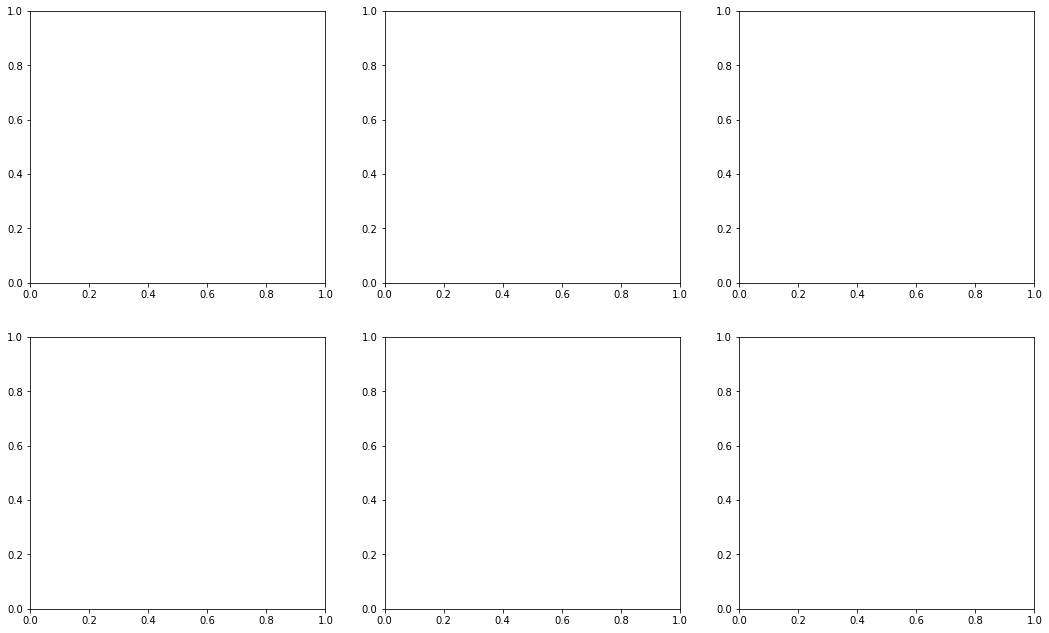

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,11)) #was 18 11
fig.patch.set_facecolor('white')

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.


([[0.5,
   0.6153846383094788,
   0.7058823704719543,
   0.2857142984867096,
   0.75,
   0.3529411852359772,
   0.4615384638309479,
   0.3636363744735718,
   0.6399999856948853,
   0.5]],
 [[0.3636363744735718,
   0.47058823704719543,
   0.7058823704719543,
   0.75,
   0.6153846383094788,
   0.7777777910232544,
   0.6666666865348816,
   0.8260869383811951,
   0.3333333432674408,
   0.5882353186607361]],
 [[0.6000000238418579,
   0.75,
   0.5,
   0.7777777910232544,
   0.6315789222717285,
   0.47999998927116394,
   0.5,
   0.875,
   0.42105263471603394,
   0.800000011920929]],
 [[0.8695651888847351,
   0.5714285969734192,
   0.4166666567325592,
   0.4000000059604645,
   0.4615384638309479,
   0.5333333611488342,
   0.4848484992980957,
   0.4444444477558136,
   0.47058823704719543,
   0.1428571492433548]])

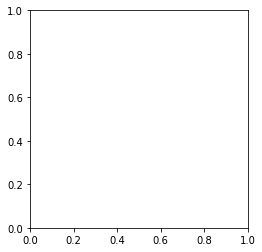

In [4]:
# #### DLBCL experement #####

root_dir = "../results_20X/DLBCL/DLBCL_random_5_s1"
data_size = 1
plot_splits(root_dir,axes[0,0],data_size,"black", "Randomly initialized weights","s")

root_dir = "../results_20X/DLBCL/DLBCL_imagenet_dino_baseline_5_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[0,0],data_size,"dodgerblue", "ImageNet SSL")

root_dir = "../results_20X/DLBCL/DLBCL_imagenet_supervised_5_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[0,0],data_size,"salmon", "ImageNet SL","D")

root_dir = "../results_20X/DLBCL/DLBCL_FlockNet1X_5_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[0,0],data_size,"springgreen", "BEVNet 1X SSL", marker='^')

root_dir = "../results_20X/DLBCL/DLBCL_FlockNet2X_5_s1"
data_size = 2.5*10**6
plot_splits(root_dir,axes[0,0],data_size,"springgreen", "BEVNet 2X SSL", marker='^')

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.


([[0.5,
   0.6153846383094788,
   0.7058823704719543,
   0.2857142984867096,
   0.75,
   0.3529411852359772,
   0.4615384638309479,
   0.3636363744735718,
   0.6399999856948853,
   0.5],
  [0.5625,
   0.7037037014961243,
   0.800000011920929,
   0.7692307829856873,
   0.5555555820465088,
   0.5769230723381042,
   0.6666666865348816,
   0.8333333134651184,
   0.6666666865348816,
   0.6153846383094788]],
 [[0.3636363744735718,
   0.47058823704719543,
   0.7058823704719543,
   0.75,
   0.6153846383094788,
   0.7777777910232544,
   0.6666666865348816,
   0.8260869383811951,
   0.3333333432674408,
   0.5882353186607361],
  [0.9629629850387573,
   0.7272727489471436,
   0.5106382966041565,
   0.875,
   0.6666666865348816,
   0.692307710647583,
   0.6000000238418579,
   0.6666666865348816,
   0.6666666865348816,
   0.782608687877655]],
 [[0.6000000238418579,
   0.75,
   0.5,
   0.7777777910232544,
   0.6315789222717285,
   0.47999998927116394,
   0.5,
   0.875,
   0.42105263471603394,
   0.80

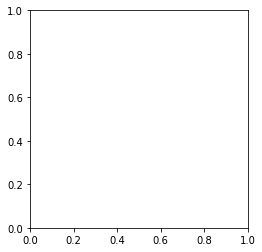

In [5]:
##### Ovarian Bevacizumab response experement #####

root_dir = "../results_10X/Ovarian/Ovarian_random_5_s1"
data_size = 1
plot_splits(root_dir,axes[0,1],data_size,"black", "random","s")

root_dir = "../results_10X/Ovarian/Ovarian_imagenet_dino_baseline_5_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[0,1],data_size,"dodgerblue", "ResNet50 DINO imagenet")


root_dir = "../results_10X/Ovarian/Ovarian_imagenet_supervised_5_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[0,1],data_size,"salmon", "ResNet50 DINO imagenet", "D")

root_dir = "../results_10X/Ovarian/Ovarian_FlockNet1X_5_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[0,1],data_size,"springgreen", "ResNet50 DINO imagenet", marker='^')

root_dir = "../results_10X/Ovarian/Ovarian_FlockNet2X_5_s1"
data_size = 2.5*10**6
plot_splits(root_dir,axes[0,1],data_size,"springgreen", "ResNet50 DINO imagenet", marker='^')

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.


([[0.5,
   0.6153846383094788,
   0.7058823704719543,
   0.2857142984867096,
   0.75,
   0.3529411852359772,
   0.4615384638309479,
   0.3636363744735718,
   0.6399999856948853,
   0.5],
  [0.5625,
   0.7037037014961243,
   0.800000011920929,
   0.7692307829856873,
   0.5555555820465088,
   0.5769230723381042,
   0.6666666865348816,
   0.8333333134651184,
   0.6666666865348816,
   0.6153846383094788],
  [0.6382978558540344,
   0.7142857313156128,
   0.6129032373428345,
   0.6666666865348816,
   0.6478873491287231,
   0.6097561120986938,
   0.6976743936538696,
   0.5365853905677795,
   0.3529411852359772,
   0.6785714030265808]],
 [[0.3636363744735718,
   0.47058823704719543,
   0.7058823704719543,
   0.75,
   0.6153846383094788,
   0.7777777910232544,
   0.6666666865348816,
   0.8260869383811951,
   0.3333333432674408,
   0.5882353186607361],
  [0.9629629850387573,
   0.7272727489471436,
   0.5106382966041565,
   0.875,
   0.6666666865348816,
   0.692307710647583,
   0.6000000238418579

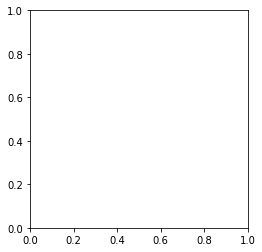

In [6]:
# Bracs  
root_dir = "../results_20X/Bracs/Bracs_random_4_s1"
data_size = 1
plot_splits(root_dir,axes[0,2],data_size,"black", "Random", "s")

root_dir = "../results_20X/Bracs/Bracs_imagenet_dino_baseline_4_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[0,2],data_size,"dodgerblue", "ResNet50 DINO imagenet")

root_dir = "../results_20X/Bracs/Bracs_imagenet_supervised_4_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[0,2],data_size,"salmon", "ResNet50 supervised imagenet","D")

root_dir = "../results_20X/Bracs/Bracs_FlockNet1X_4_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[0,2],data_size,"springgreen", "2X satelite 40 epocs", marker='^')

root_dir = "../results_20X/Bracs/Bracs_FlockNet2X_half_4_s1"
data_size = 2.5*10**6
plot_splits(root_dir,axes[0,2],data_size,"springgreen", "2X satelite 40 epocs", marker='^')

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.


([[0.5,
   0.6153846383094788,
   0.7058823704719543,
   0.2857142984867096,
   0.75,
   0.3529411852359772,
   0.4615384638309479,
   0.3636363744735718,
   0.6399999856948853,
   0.5],
  [0.5625,
   0.7037037014961243,
   0.800000011920929,
   0.7692307829856873,
   0.5555555820465088,
   0.5769230723381042,
   0.6666666865348816,
   0.8333333134651184,
   0.6666666865348816,
   0.6153846383094788],
  [0.6382978558540344,
   0.7142857313156128,
   0.6129032373428345,
   0.6666666865348816,
   0.6478873491287231,
   0.6097561120986938,
   0.6976743936538696,
   0.5365853905677795,
   0.3529411852359772,
   0.6785714030265808],
  [0.9090909361839294,
   1.0,
   1.0,
   0.9090909361839294,
   0.800000011920929,
   1.0,
   0.5,
   0.8888888955116272,
   0.9090909361839294,
   0.9090909361839294]],
 [[0.3636363744735718,
   0.47058823704719543,
   0.7058823704719543,
   0.75,
   0.6153846383094788,
   0.7777777910232544,
   0.6666666865348816,
   0.8260869383811951,
   0.3333333432674408,

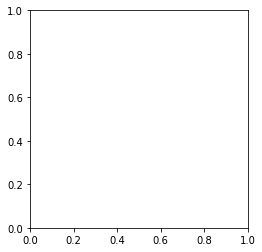

In [7]:
# ##### HunCRC experement #####
root_dir = "../results_20X/HunCRC/HunCRC_random_3_s1"
data_size = 1
plot_splits(root_dir,axes[1,0],data_size,"black", "random","s")


root_dir = "../results_20X/HunCRC/HunCRC_imagenet_dino_baseline_3_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[1,0],data_size,"dodgerblue", "ResNet50 DINO imagenet")


root_dir = "../results_20X/HunCRC/HunCRC_imagenet_supervised_3_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[1,0],data_size,"salmon", "ResNet50 DINO imagenet", "D")


root_dir = "../results_20X/HunCRC/HunCRC_FlockNet1X_3_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[1,0],data_size,"springgreen", "ResNet50 DINO imagenet",'^')


root_dir = "../results_20X/HunCRC/HunCRC_FlockNet2X_half_3_s1"
data_size = 2.5*10**6
plot_splits(root_dir,axes[1,0],data_size,"springgreen", "ResNet50 DINO imagenet",'^')

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.


([[0.5,
   0.6153846383094788,
   0.7058823704719543,
   0.2857142984867096,
   0.75,
   0.3529411852359772,
   0.4615384638309479,
   0.3636363744735718,
   0.6399999856948853,
   0.5],
  [0.5625,
   0.7037037014961243,
   0.800000011920929,
   0.7692307829856873,
   0.5555555820465088,
   0.5769230723381042,
   0.6666666865348816,
   0.8333333134651184,
   0.6666666865348816,
   0.6153846383094788],
  [0.6382978558540344,
   0.7142857313156128,
   0.6129032373428345,
   0.6666666865348816,
   0.6478873491287231,
   0.6097561120986938,
   0.6976743936538696,
   0.5365853905677795,
   0.3529411852359772,
   0.6785714030265808],
  [0.9090909361839294,
   1.0,
   1.0,
   0.9090909361839294,
   0.800000011920929,
   1.0,
   0.5,
   0.8888888955116272,
   0.9090909361839294,
   0.9090909361839294],
  [0.6666666865348816,
   0.7368420958518982,
   0.7142857313156128,
   0.7142857313156128,
   0.7777777910232544,
   0.5333333611488342,
   0.8421052694320679,
   0.6666666865348816,
   0.625,


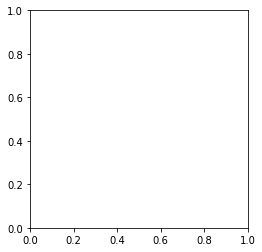

In [8]:
# ##### Yale experement #####

root_dir = "../results_20X/Yale/Yale_random_5_s1"
data_size = 1
plot_splits(root_dir,axes[1,1],data_size,"black", "Randomly initialized weights", "s")


root_dir = "../results_20X/Yale/Yale_imagenet_dino_baseline_5_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[1,1],data_size,"dodgerblue", "ImageNet SSL (DINO)")


root_dir = "../results_20X/Yale/Yale_imagenet_supervised_5_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[1,1],data_size,"salmon", "ImageNet SL", "D")


root_dir = "../results_20X/Yale/Yale_FlockNet1X_5_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[1,1],data_size,"springgreen", "FlockNet 1X", marker='^')


root_dir = "../results_20X/Yale/Yale_FlockNet2X_5_s1"
data_size = 2.5*10**6
plot_splits(root_dir,axes[1,1],data_size,"springgreen", "FlockNet 2X",marker='^')



/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.


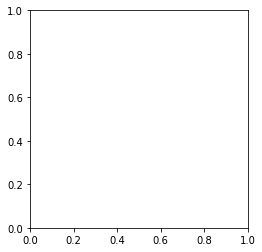

In [9]:
# #### PANDAS experement #####

root_dir = "../results_10X/PANDA/PANDA_random_5_s1"
data_size = 1
plot_splits(root_dir,axes[1,2],data_size,"black", "Randomly initialized weights","s")

root_dir = "../results_10X/PANDA/PANDA_imagenet_dino_baseline_5_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[1,2],data_size,"dodgerblue", "ImageNet SSL")

root_dir = "../results_10X/PANDA/PANDA_imagenet_supervised_5_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[1,2],data_size,"salmon", "ImageNet SL","D")

root_dir = "../results_10X/PANDA/PANDA_FlockNet1X_5_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[1,2],data_size,"springgreen", "FlockNet 1X SSL", marker='^')

root_dir = "../results_10X/PANDA/PANDA_FlockNet2X_half_5_s1"
data_size = 2.5*10**6
ImageNet_SSL_F1s, BEVnet_F1s,BEVnet2x_F1s, ImageNet_F1s = plot_splits(root_dir,axes[1,2],data_size,"springgreen", "FlockNet 2X SSL", marker='^') # return final lists.

## Statistical analysis

In [10]:
ImageNet_SSL_F1s = np.array(ImageNet_SSL_F1s)
BEVnet_F1s = np.array(BEVnet_F1s)
ImageNet_F1s = np.array(ImageNet_F1s)
BEVnet2x_F1s = np.array(BEVnet2x_F1s)
# shape 6,10


# # # get mean percentage increase
# IN_incease = np.mean((BEVnet_F1s - ImageNet_F1s)/ImageNet_F1s * 100)
# IN_SSL_incease = np.mean((BEVnet_F1s - ImageNet_SSL_F1s)/ImageNet_SSL_F1s * 100)

# print("BEVnet over imagenet %", IN_incease)
# print("BEVnet over imagenet ssl %", IN_SSL_incease)



0.04578464467789902
0.006287272292749879
0.04647969855673747
0.17135483009174302
1.1444174866417467e-07
0.311180557331155


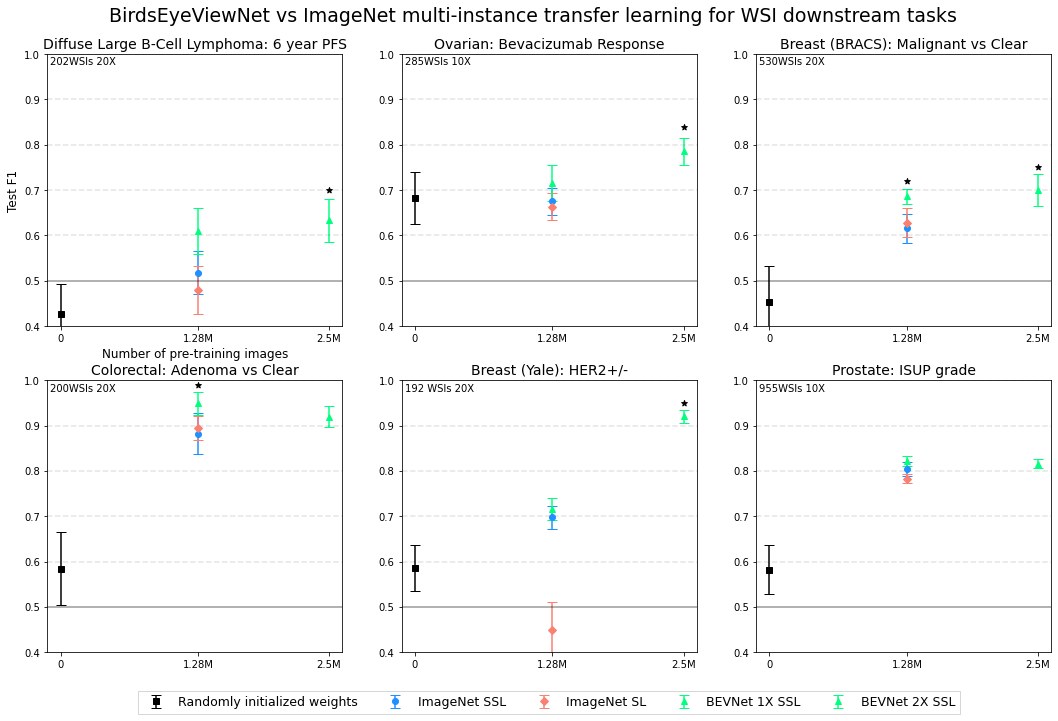

In [11]:
# log scale x axis
fig.suptitle('BirdsEyeViewNet vs ImageNet multi-instance transfer learning for WSI downstream tasks', fontsize=19, y=0.94)

axes[0,0].legend(loc='lower center', bbox_to_anchor=(1.7, -1.45),fontsize=12.5, fancybox=False, shadow=False, ncol=5)

axes[1,1].set_title("Breast (Yale): HER2+/-", fontsize=14)
axes[1,1].text(.01, .99, '192 WSIs 20X', ha='left', va='top', transform=axes[1,1].transAxes)
axes[1,1].set_zorder(-1)


axes[0,2].set_title("Breast (BRACS): Malignant vs Clear", fontsize=14)
axes[0,2].text(.01, .99, '530WSIs 20X', ha='left', va='top', transform=axes[0,2].transAxes)

axes[0,1].set_title("Ovarian: Bevacizumab Response", fontsize=14)
axes[0,1].text(.01, .99, '285WSIs 10X', ha='left', va='top', transform=axes[0,1].transAxes)

axes[1,0].set_title("Colorectal: Adenoma vs Clear", fontsize=14)
axes[1,0].text(.01, .99, '200WSIs 20X', ha='left', va='top', transform=axes[1,0].transAxes)

axes[1,2].set_title("Prostate: ISUP grade", fontsize=14)
axes[1,2].text(.01, .99, '955WSIs 10X', ha='left', va='top', transform=axes[1,2].transAxes)

axes[0,0].set_title("Diffuse Large B-Cell Lymphoma: 6 year PFS", fontsize=14)
axes[0,0].text(.01, .99, '202WSIs 20X', ha='left', va='top', transform=axes[0,0].transAxes)


def map_to_axes(number):
    if 0 <= number <= 2:
        a = 0
        b = number
    elif 3 <= number <= 5:
        a = 1
        b = number - 3
    elif number == 6:
        a = 2
        b = 0
    else:
        raise ValueError("Input number must be between 0 and 6")
    return a, b


heights = [0.7,0.84,0.75,0.99,0.95]
# add significance stars of SSL.
# Define the significance level (alpha)
alpha = 0.05  # Adjust as needed
for i in range(6):
    a, b = map_to_axes(i)

    imageNet_mean = np.mean(ImageNet_SSL_F1s[i,:])
    t_statistic, p_value = stats.ttest_1samp(BEVnet_F1s[i,:], imageNet_mean)
    
    #tests for 1X models
    if p_value < alpha:
        if i == 2:
            axes[a,b].scatter(1280000, 0.72, label='*p<0.05', color='black', marker='*')
        else:
            axes[a,b].scatter(1280000, heights[i], label='*p<0.05', color='black', marker='*')

    #tests for 2X models
    t_statistic, p_value = stats.ttest_1samp(BEVnet2x_F1s[i,:], imageNet_mean)
    print(p_value)
    if p_value < alpha:
        axes[a,b].scatter(2500000, heights[i], label='*p<0.05', color='black', marker='*')


# Loop over each axes and add dashed lines
for ax in axes.flat[:]:
    ax.axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
    ax.axhline(0.6, linestyle='--', color='black',alpha=0.1)  # Add a dashed line at y=0
    ax.axhline(0.7, linestyle='--', color='black',alpha=0.1)  # Add a dashed line at y=0
    ax.axhline(0.8, linestyle='--', color='black',alpha=0.1)  # Add a dashed line at y=0
    ax.axhline(0.9, linestyle='--', color='black',alpha=0.1)  # Add a dashed line at y=0
    ax.axhline(1, linestyle='--', color='black',alpha=0.1)  # Add a dashed line at y=0
    ax.set_ylim([0.40,1])


display(fig)
fig.savefig('../figures/All_downstream_tasks.png', dpi=300 ,bbox_inches='tight', pad_inches=.2, facecolor='white')